Some important notes:

- Don't worry if your group doesn't complete the challenge. We will assess your submission based on originality, quality, and presentation, rather than the extent to which you've completed the challenge.
- You're welcome to add as many markdown or code cells as necessary to the notebook.
- Before submitting, ensure that the notebook runs properly. Otherwise, it won't be evaluated.
- If you have any questions or concerns, please contact the organizers. We'll be available during the event, but if you can't reach us, feel free to send an email to berta.casas@bsc.es or sergi.masot@bsc.es.

Good luck!

# BSC Challenge: The Last Circuit Cut


The latest developments in geopolitics at the closing of the 21st century brought upon us the biggest war the world had ever seen. The main countries of the world have arranged themselves, through pacts and treacherous schemes, into two opposing blocks. In the tense standstill that has been reached, they threaten to destroy what is left of our planet with cutting-edge bioweapons in their efforts to erase each other. But scientists all over the world are still able to communicate, using the remains of a fragmented internet, held together only by a hidden data station in the dark side of the moon and their efforts to maintain it running. They are working together to force the imperial forces of both sides to lay down arms and find a peaceful resolution.  

In the last months, a group of scientists have been discussing the use of quantum computation to scale down the conflict. They want to use simulations to quickly find cures to the imperial weapons, and dismantle their grasp on the future of the world. Create a resistance force that can drive them to negotiate peacefully. However, the imperial forces are well aware of this possibility, and in what was the only truce of the war, they joined forces to destroy the most important quantum chip factories in the world. Now, only old devices from the long past NISQ era are left in the hands of the researchers, kept safe in their hidden, underground laboratories.

But not all hope is lost.

Among mounts of hundreds of elderly scrolls - which were surely about to be read by some PhD who had lost control of his to-read pile - they found references to circuit-cutting techniques. In these, NISQ chips are used to run small circuits many times in a specific setup that lets us collect the statistics and build the results of the larger, now unavailable (again) circuits. They think this could lead to a breakthrough, but all available hands are already busy sustaining the communication network, updating their Python libraries to keep the defences up (physicists are still using Python despite the best efforts of computer scientists) and optimizing the algorithms that they want to run, so they need help with the execution of the cuts. Their helium reserves for cryogenic fridges are starting to run low, and they are desperate to reach results.

They decide to invoke the ancient code of the hackathon. Maybe some challengers will raise up to the call...


## Circuit cutting theory

To begin, we will attempt to break down a small circuit. Let us examine one of the descriptions of circuit cutting, which we recommend using for this challenge. The derivation has been extracted from the remaining manuscripts https://arxiv.org/abs/1904.00102 and https://arxiv.org/abs/2012.02333. We will take advantage of the fact that any quantum circuit can be regarded as a directed graph $G = (V, E)$, where the vertices are represented by input states ($\triangleright$), quantum gates ($\square$), and observables ($\triangleleft$), and the edges are represented by the indices that link the vertices. Each vertex can be associated with a tensor $A(v)$ that encodes the matrix entries of the vertex (the state, the quantum gate, or the observable). We denote $\mathcal{A} = \{A(v)| v \in V\}$ as the set of all the tensors. All of these tensors $\mathcal{A}$ associated with the vertices $V$ and their corresponding edges $E$ form a tensor network $T(G, \mathcal{A})$ that is equivalent to the quantum algorithm that implements the quantum circuit.


Now that we know that we can represent any quantum algorithm by a tensor network, we are going to explain how we can **cut a qubit wire** and still reconstruct the quantum algorithm with classical post-processing. A single-qubit wire can be replaced by




\begin{equation}
u  \longrightarrow v \implies \sum_{i=1}^8 c_i \ u \longrightarrow  \ket{O_i} \bra{\rho_i}\longrightarrow v,
\end{equation}

where the left hand of the equation represents any one-qubit edge $uv$ and the right hand of the equation is the reconstruction of this edge. What this equation means is that there exists a specific set of eight coefficients $c_i\in \{- \frac 12, \frac 12\}$, obervables $O_i$ and states $\rho_i$ (that we are going to characterize) such that can replace the edge $uv$ and does not affect the value of the overall tensor network. In fact, we obtain a set of eight tensor networks $T(G', \mathcal{A}_i)$ with different graph and tensor structure that can replace the original tensor network in the following manner: 

$$T(G, \mathcal{A}) = \sum_{i=1}^8 c_i T(G', \mathcal{A}_i). \tag{2}$$



For gaining intuition in this processes, we are going to express any 2x2 matrix $A$ in terms of the Pauli matrices:

$$I = \begin{bmatrix} 1 &0 \\ 0 &1 \end{bmatrix}, \quad X = \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix}, \quad Y = \begin{bmatrix} 0 &-i \\ i &0 \end{bmatrix}, \quad Z = \begin{bmatrix} 1 &0 \\ 0 &-1 \end{bmatrix}. \tag{3} $$

The normalized Pauli matrices $\{I,X,Y,Z\}/\sqrt{2}$ form an orthonormal matrix basis, then we can decompose any general 2x2 matrix A into 

$$A = \frac{Tr(AI)I+ Tr(AX)X + Tr(AY)Y + Tr(AZ)Z}{2}.$$


By expanding the Pauli matrices in each eigenbasis: 

$$O_1 = I, \quad \rho_1= \ket{0}\bra{0}, \quad c_1 = +1/2, \\ 
O_2 = I , \quad \rho_2= \ket{1}\bra{1}, \quad c_2 = +1/2, \\
O_3 = X , \quad \rho_3= \ket{+}\bra{+}, \quad c_3 = +1/2, \\
O_4 = X, \quad \rho_4= \ket{-}\bra{-}, \quad c_4 =  -1/2,\\
O_5 = Y, \quad \rho_5= \ket{+i}\bra{+i}, \quad c_5 = +1/2, \\
O_6 = Y, \quad \rho_6= \ket{-i}\bra{-i}, \quad c_6 = -1/2, \\
O_7 = Z, \quad \rho_7= \ket{0}\bra{0}, \quad c_7 = +1/2,  \\
O_8 = Z, \quad \rho_8= \ket{1}\bra{1}, \quad c_8 = -1/2, \tag{4}\\
$$


where $\ket{\pm} = \frac{\ket{0}\pm \ket{1}}{\sqrt 2}$ and  $\ket{\pm i } = \frac{\ket{0}\pm i\ket{1}}{\sqrt 2}$. The observables $O_i$ represent each Pauli matrix, $\rho_i$ each eigenprojector or eigenvectors and $2c_i$ their eigenvalues. Then, we can rewrite the general matrix: 

$$A = \frac{Tr(AI)\big(\ket{0}\bra{0}+\ket{1}\bra{1}\big)+ Tr(AX)\big(\ket{+}\bra{+}-\ket{-}\bra{-}\big)+Tr(AY)\big(\ket{+i}\bra{+i}-\ket{-i}\bra{-i}\big)+Tr(AZ)\big(\ket{0}\bra{0}-\ket{1}\bra{1}\big)}{2}$$

In physical terms, applying the trace operator is equivalent to measuring a qubit in one of the Pauli bases, whereas utilizing a density matrix corresponds to physically initializing the qubit in a specific eigenstate. We define a quantum map given by 

$$ \Phi_i(A) = Tr(A O_i) \rho_i,$$ 

 
which consists of first measuring the Pauli observable $O_i$ on the cut and then continuing the wire initialized to another state given by $\rho_i$. We have to apply the map eight times (with its corresponding measurement and preparation) to reconstruct our arbitrary matrix

$$A = \sum_{i=1}^8 c_i \Phi_i(A).$$

This decomposition also applies to maps $\Phi$ acting on larger systems. Let's see an example that may summarize ideas with a larger circuit: 

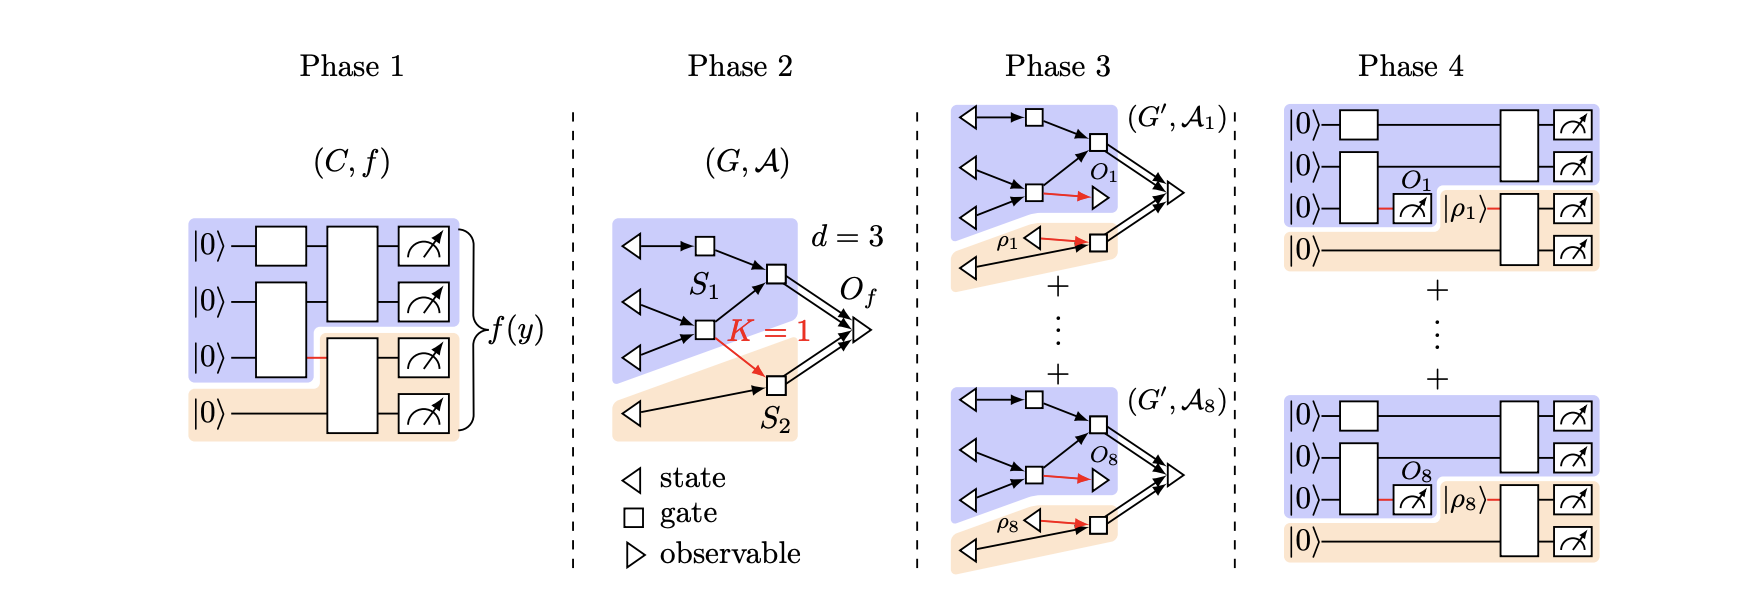*Figure from https://arxiv.org/abs/1904.00102*


In Phase 1, a quantum circuit to be cut is presented. It should be noted that only a single qubit wire is being cut. Phase 2 illustrates the representation of the quantum circuit with a tensor network. Phase 3 shows the decomposition of the original tensor network into eight different tensor network structures. These structures correspond to distinct quantum circuits, each with different measurements and state initializations, as depicted in Phase 4. The final output of the eight states is summed together according to Eq. (2) and with the corresponding $c_i$ shown in Eq. (4). 


To sum up, the steps followed in the cutting algorithm are: 

1. Choose the cut location.

2. Compute the expectation value of the observables $O_i\in \{I,X,Y,Z\}$ in the cut.

 *Hint: For computing the expectation value of I and Z, we have to measure on the same basis (the computational basis) but for measuring the expectation value of X and Y we have to change the basis of the qubit and measure. For example, for computing $\langle X \rangle$ we apply the Hadamard gate $H$, having mapped our qubit into the X basis. Now by only measuring, we can extract the information of the state on the X basis. For changing from the computational basis to the $Y$ basis we apply  $S^{\dagger} H$.*

3. The other cut of the circuit is initialized with the eight eigenstates given by the $\rho_i$ in Eq. (4) and then we run the sub-circuit. 

*Hint 2: For initializing into the different quantum states we can apply quantum gates to the zero states. For example: $\ket{1} = X \ket{0}$, $\ket{+}= H\ket{0}$, etc.*


4. With classical post-processing, we add together the outputs of the quantum circuits with the corresponding coefficients $c_i$.

 *Hint 3: Notice that if we have $n$ qubits and we do only one cut, we split the circuit into $\ket{q_1q_2...q_l}$ and $\ket{q_{l}'...q_n}$ like:*
 
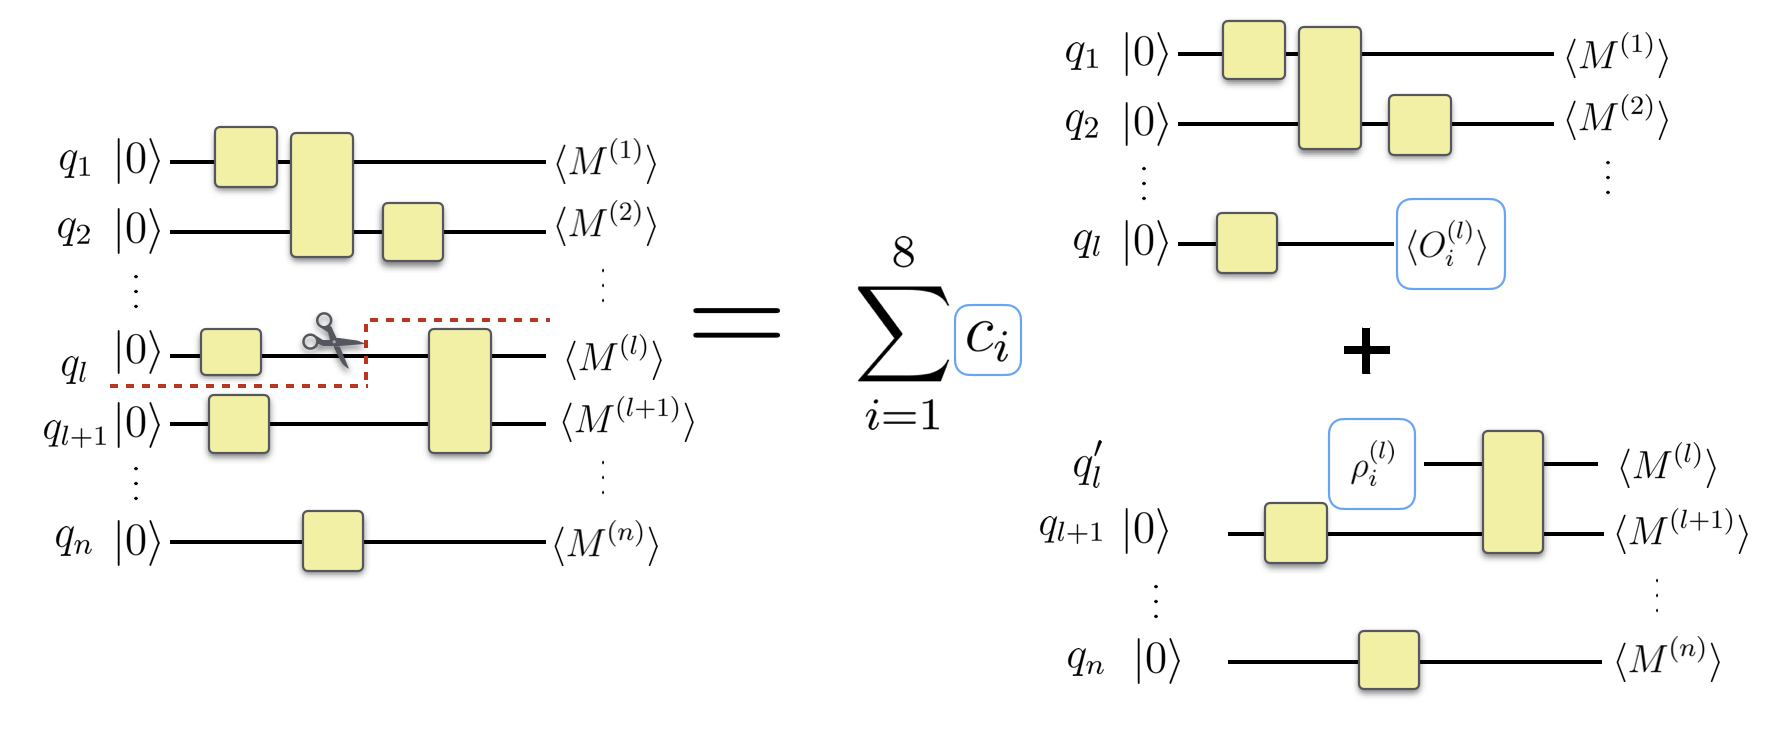


 *Then we will have to multiply expectations values of the type $\langle M^{(1)} M^{(2)}...O_i^{(l)}\rangle \langle M^{(l)}...M^{(n)}\rangle_{\rho_i^{(l)}}$, where the first bracket indicates measuring the first $l-1$ qubits and computing a given observable $M^{(j)}$, except from the last one, which we measure according to $O_i$ from Eq. 4. The second expectation value corresponds to the other cut of the circuit but with the qubit $q'_{l}$ (different from $q_l$ in the other sub-circuit) initialized to the state $\rho_i$ from Eq. 4 (indicated by the subscript $\rho_i^{(l)}$). Finally, the reconstruction of the  expectation value is given by:*

 $$\langle M^{(1)}M^{(2)}...M^{(l)}...M^{(n)}\rangle = \sum_{i=1}^8 c_i \langle M^{(1)} M^{(2)}...O_i^{(l)}\rangle \langle M^{(l)}...M^{(n)}\rangle_{\rho_i^{(l)}}$$





### First step 

We have the following quantum circuit: 

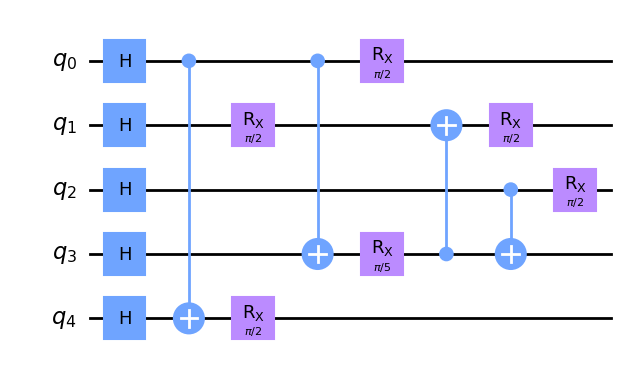

1. **Find a cut that is able to split the circuit into two subcircuits of three qubits each**. *Hint*: You can re-arrange the qubits ordering to find an optimal cut. In this step, you only have to indicate where you cut the circuit.

2. With exact simulation (for example, statevector simulation) compute the expectation value of the observable $\langle  X \otimes X \otimes X \otimes X \otimes X \rangle$ in the whole quantum circuit. Compare it with the expectation value obtained when we cut the circuit with the techniques explained above. Compare its value. Do we introduce errors by doing the cut? Justify it. 

----------

When the circuit is cut, a statistical error is introduced, as the expected values calculated in the first subcircuit have a relative uncertainty of $\epsilon_r \sim 1/\sqrt{N}$. This is because the number of measures is finite, and their probability follows a Bernoulli distribution that converges with the aforementioned dependency. In the case of our first circuit, the cut is in a position where the mesured state is an eigenstate of the X operator. This has minimized the error and the computational power needed, as an eigenstate can be analyzed precisely with less measures.

In the case of real quantum computers we can see more errors associated to noise, that could be mitigated with circuit cutting if enough measures are used applying the correct methods.

----------

3. Now, run the entire and the cut circuit in a quantum computer simulator (you can choose among the options that qiskit provides) and compare its results. Once the code works for the simulator, send it to the *ibmq_jakarta* quantum computer. Which expectation value has more error compared to the theoretical one, the entire circuit or the cut circuit? What explanation can you find?


*Tip: To make sure that your algorithm is cutting correctly the circuit, try different quantum circuits (for instance, changing the gates) and see if also work.*

*Tip 2*: Remember that qiskit ordering is $\ket{q_{n-1}, q_{n-2},..., q{_0}}$, where $n$ is the number of qubits. 

### 1. Finding the cut and spliting the circuit

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # enlarge fonts


# Import standard qiskit modules 
from qiskit import QuantumCircuit, QuantumRegister


#For doing exact simulation you can use Statevector (feel free to use something else)
from qiskit.quantum_info import Statevector, Operator

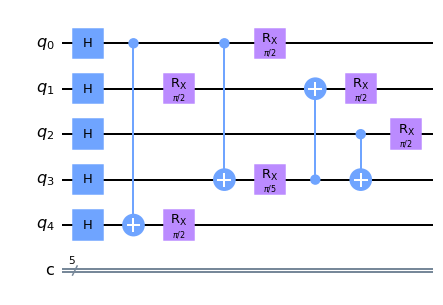

In [37]:
'''
We can recreate the full circuit using qiskit
'''
def get_refCirc():
    circ = QuantumCircuit(5, 5)
    circ.h(range(5))
    circ.cx(0, 4)
    circ.rx(np.pi / 2, 4)
    circ.cx(0, 3)
    circ.rx(np.pi / 2, 0)
    circ.rx(np.pi / 2, 1)
    circ.rx(np.pi / 5, 3)
    circ.cx(3, 1)
    circ.rx(np.pi / 2, 1)
    circ.cx(2, 3)
    circ.rx(np.pi / 2, 2)
    return circ

get_refCirc().draw(output="mpl")

----------

To better see the splitting, we can rearrange the circuit.

In the first part there are the qbits corresponding to the previous 0,4,3 qbits.

In the second part there are the qbits corresponding to the previous 3,1,2 bits.

----------

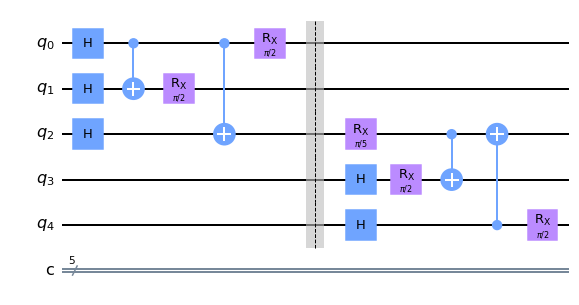

In [42]:
def get_mainCirc():
    circ = QuantumCircuit(5, 5)
    circ.h([0,1,2])
    circ.cx(0,1)
    circ.rx(np.pi / 2, 1)
    circ.cx(0, 2)
    circ.rx(np.pi / 2, 0)
    circ.barrier()
    circ.h([3,4])
    circ.rx(np.pi / 5, 2)
    circ.rx(np.pi / 2, 3)
    circ.cx(2, 3)
    circ.cx(4, 2)
    circ.rx(np.pi / 2, 4)
    return circ

get_mainCirc().draw(output="mpl")

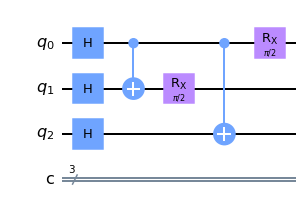

In [39]:
# Then, the splitting of the circuits goes as follows:

def get_circ1():
    circ = QuantumCircuit(3, 3)
    circ.h([0,1,2])
    circ.cx(0,1)
    circ.rx(np.pi / 2, 1)
    circ.cx(0, 2)
    circ.rx(np.pi / 2, 0)
    return circ

def get_circ2():
    circ = QuantumCircuit(3, 3)
    circ.h([1,2])
    circ.rx(np.pi / 5, 0)
    circ.rx(np.pi / 2, 1)
    circ.cx(0, 1)
    circ.cx(2, 0)
    circ.rx(np.pi / 2, 2)
    return circ

get_circ1().draw(output="mpl")

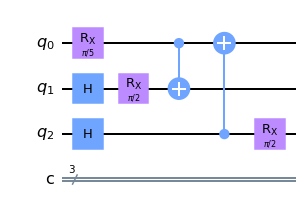

In [40]:
get_circ2().draw(output="mpl")

--------------

It is important to note that the spliting is done before the Rx (n/5) gate, but it could be done after that gate. The reason we chose to do that is to have less operations in the first circuit, as we will need to run that part more times than the second circuit. 

The reason to that is because in the first circuit we need to run simulations for 4 observables to obtain the expected value. In circuit 2 we will be doing only measures for observable X, so that means at least 3 times less measurements.

--------------

### 2 - Exact simulation (StateVector simulation)
First we will do the exact simulation with the main circuit and latter do the circuit cutting. 

In [59]:
# Matrix operators
X = Operator.from_label("X")
Y = Operator.from_label("Y")
Z = Operator.from_label("Z")
I = Operator.from_label("I")

print("DEFINITION OF OPERATOR X:")
print(X)
print("")
print("DEFINITION OF OPERATOR Y:")
print(Y)
print("")
print("DEFINITION OF OPERATOR Z:")
print(Z)
print("")
print("DEFINITION OF OPERATOR I:")
print(I)
print("")

DEFINITION OF OPERATOR X:
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

DEFINITION OF OPERATOR Y:
Operator([[0.+0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

DEFINITION OF OPERATOR Z:
Operator([[ 1.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))

DEFINITION OF OPERATOR I:
Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))



In [60]:
# X operator measurement and expected value for whole circuit

mainCirc = get_mainCirc()
# Calculating Statevector + expected value in whole circuit
# Initialize the statevector with all the qubits at 0. Returns the evolved statevector
statevector = Statevector.from_instruction(mainCirc)
print("EVOLVED STATEVECTOR:")
print(statevector)
print("")

# Calculate the expected value for the X measurement in the whole circuit
Result = statevector.expectation_value(X ^ X ^ X ^ X ^ X)
print("EXPECTED VALUE:")
print(Result)


EVOLVED STATEVECTOR:
Statevector([-0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j,
             -0.16812463+0.054627j, -0.16812463+0.054627j],
            dims=(2, 2, 2, 2, 2))


--------------

For the circuit cutting, we need to:
- Measure the observables I,X,Y,Z in the last bit in circuit 1 while measuring X in the other bits. Get the expected value of the system for all 4 cases.
- Get 8 initial states, where the first qubit of circuit 2 is equal to each possible eigenvalue for each operator, while the other qubits remain 0 in each case. Measure X for the whole system and get the expected values in each case.
- Reconstruct the expected value for the whole circuit with the equation given.

--------------

In [49]:
# FIRST CIRCUIT ANALYSIS

circ1 = get_circ1()

# This initializes the statevector at the |0> state (all zeros), and then evolves it under the circuit
stateVector = Statevector.from_instruction(circ1)
print("State vector after the circuit:")
print(stateVector)

# Measure X everywhere and other operators in last bit
expected_x = stateVector.expectation_value(X ^ X ^ X)
expected_y = stateVector.expectation_value(X ^ X ^ Y)
expected_z = stateVector.expectation_value(X ^ X ^ Z)
expected_i = stateVector.expectation_value(X ^ X ^ I)

print("")
print("Expected value of X:", expected_x)
print("Expected value of Y:", expected_y)
print("Expected value of Z:", expected_z)
print("Expected value of I:", expected_i)

State vector after the circuit:
Statevector([0.-0.35355339j, 0.-0.35355339j, 0.-0.35355339j,
             0.-0.35355339j, 0.-0.35355339j, 0.-0.35355339j,
             0.-0.35355339j, 0.-0.35355339j],
            dims=(2, 2, 2))

Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)


In [61]:
# SECOND CIRCUIT STATEVECTORS

def cutted_statevalues(circ, cq, op):
    # Creation of different initial cutted qubit (cq) states for the circuit 2:
    # Impportant to note that qiskit takes inputs and gives outputs from last qubit to the first one
    qnum = circ.num_qubits
    expVal = []
    for c in ["0", "1", "+", "-", "r", "l", "0", "1"]:
        label = "0" * (qnum - cq - 1) + c + "0" * (cq) # Create the state
        stateVector = Statevector.from_label(label)
        final = stateVector.evolve(circ)
        expVal.append(final.expectation_value(op))
    return expVal

circ2 = get_circ2()
# Qubit to change initial states is the first one (0)
expVal = cutted_statevalues(circ2,0,X^X^X)

opNames = ["I0", "I1", "+", "-", "r", "l", "0", "1"]
for o in range(len(opNames)):
    print("Expected value of |"+opNames[o]+">:", expVal[o])

Expected value of |I0>: (0.9999999999999998+0j)
Expected value of |I1>: (0.9999999999999998+0j)
Expected value of |+>: (0.9999999999999998+0j)
Expected value of |->: (0.9999999999999998+0j)
Expected value of |r>: (0.9999999999999998+0j)
Expected value of |l>: (0.9999999999999998+0j)
Expected value of |0>: (0.9999999999999998+0j)
Expected value of |1>: (0.9999999999999998+0j)


In [56]:
# Reconstruct the expectation value from the gotten values from circuits 1 and 2

# Coefficients of the 8 eigenvalues
coefficients = [1 / 2, 1 / 2, 1 / 2, -1 / 2, 1 / 2, -1 / 2, 1 / 2, -1 / 2]
expectedValues = [expected_i, expected_i, expected_x, expected_x, expected_y, expected_y, expected_z, expected_z]

totalExpectation = 0
for prod in zip(coefficients, expectedValues, expVal):
    totalExpectation += np.prod(prod)

print("Final expectation with circuit cuttting:", totalExpectation)

Final expectation with circuit cuttting: (0.9999999999999996+0j)


--------------

As observed, with the exact simulation we can reproduce exactly the results for the whole circuit with circuit-cutting. This is because both final expected values are equal, and in this case, equal to one.

--------------

### 3-Classical simulator

In [57]:
# Create functions for measuring I,X,Y,Z states in circuit

def Imeasure(circuit, qubit, cbit):
    """
    Measure the qubit in the Identity
    """
    circuit.measure(qubit, cbit)

    return circuit

def Xmeasure(circuit, qubit, cbit):
    """
    Measure the qubit in the X-basis
    """
    circuit.h(qubit)
    circuit.measure(qubit, cbit)

    return circuit

def Ymeasure(circuit, qubit, cbit):
    circuit.sdg(qubit)
    circuit.h(qubit)
    circuit.measure(qubit, cbit)

    return circuit

def Zmeasure(circuit, qubit, cbit):
    """
    Measure the qubit in the Z-basis
    """
    circuit.measure(qubit, cbit)

    return circuit

In [62]:
# SIMULATOR WITH HISTOGRAM

def histogram(circ, s):
    backend = Aer.get_backend("qasm_simulator")
    job = execute(circ, backend, shots=s)
    result = job.result()
    counts = result.get_counts(circ)
    return counts

In [65]:
# WHOLE CIRCUIT

mainCirc = get_mainCirc()
Result = statevector.expectation_value(X ^ X ^ X ^ X ^ X)
print("Expectation value:", Result)

mainCircuit = Xmeasure(mainCirc, range(5), range(5))
mainCircuit.draw(output="mpl")

count = histogram(mainCircuit, 1000)

Expectation value: (0.9999999999999998+0j)


----------------

Same expectation value found at the previous section.

----------------

In [13]:
# Create mapping for further functions

mapping = {
    "I": Imeasure,
    "X": Xmeasure,
    "Y": Ymeasure,
    "Z": Zmeasure,
}


def measure_from_label(label):
    """Returns the measurement functions that must be ran to add measurements to a circuit.

    Parameters
    ----------
    label : str
        The label of the measurement to be performed. (For example, "XIX" or "YIY", which runs the
        measurement of the X operator on the first and third qubits.)
    """

    def measure(circuit):
        for i, char in enumerate(label):
            mapping[char](circuit, i, i)
        return circuit

    return measure

Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)


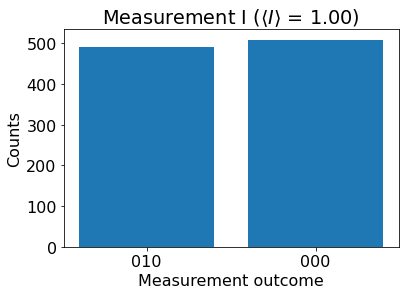

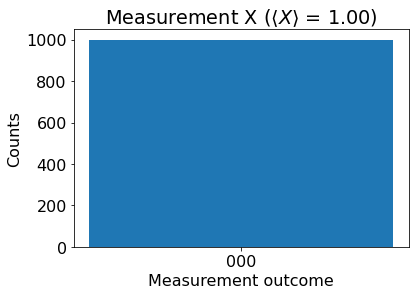

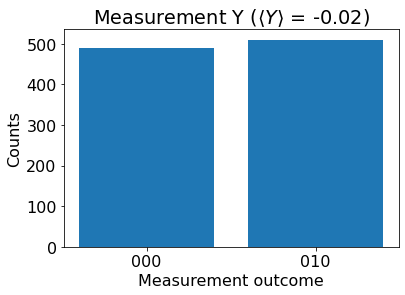

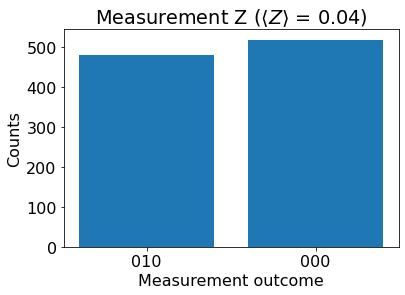

In [26]:
# FIRST CIRCUIT

def run_class_circ1(s,circ_func,makeGraph=True):
    # Matrix operators
    X = Operator.from_label("X")
    Y = Operator.from_label("Y")
    Z = Operator.from_label("Z")
    I = Operator.from_label("I")

    # This initializes the statevector at the |0> state (all zeros), and then evolves it under the circuit
    stateVector = Statevector.from_instruction(circ_func())

    print("Expected value of X:", stateVector.expectation_value(X ^ X ^ X))
    print("Expected value of Y:", stateVector.expectation_value(Y ^ X ^ X))
    print("Expected value of Z:", stateVector.expectation_value(Z ^ X ^ X))
    print("Expected value of I:", stateVector.expectation_value(I ^ X ^ X))


    backend = Aer.get_backend("qasm_simulator")
    shots = s
    expectedValues = {
        "I": 0,
        "X": 0,
        "Y": 0,
        "Z": 0,
    }

    for m in expectedValues.keys():
        circ = circ_func()
        measure_from_label(f"{m}XX")(circ)

        job = execute(circ, backend, shots=shots)
        result = job.result()
        counts = result.get_counts(circ)

        if m != "I":
            expectedValues[m] = sum(
                [
                    np.real(Statevector.from_label(label).expectation_value(Z ^ Z ^ Z)) * count / shots
                    for label, count in counts.items()
                ]
            )
        else:
            expectedValues[m] = sum(counts.values()) / shots
        if makeGraph == True:
            plt.figure()
            plt.bar(counts.keys(), counts.values())
            plt.title(f"Measurement {m} ($\langle {m}\\rangle$ = {expectedValues[m]:.2f})")
            plt.xlabel("Measurement outcome")
            plt.ylabel("Counts")
            plt.show()

    return expectedValues

expectedValuesClassical_1 = run_class_circ1(1000,get_circ1,True)

In [66]:
# SECOND PART CIRCUIT

def get_circ2_v2(initialCircuit=None):
    if not initialCircuit:
        circ2 = QuantumCircuit(3, 3)
    else:
        circ2 = initialCircuit
    circ2.h(range(2))
    circ2.rx(np.pi / 2, 0)
    circ2.rx(np.pi / 5, 2)
    circ2.cx(2, 0)
    circ2.rx(np.pi / 2, 0)
    circ2.cx(1, 2)
    circ2.rx(np.pi / 2, 1)
    return circ2

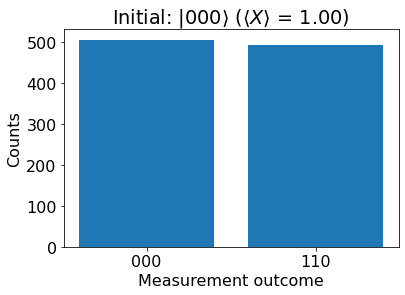

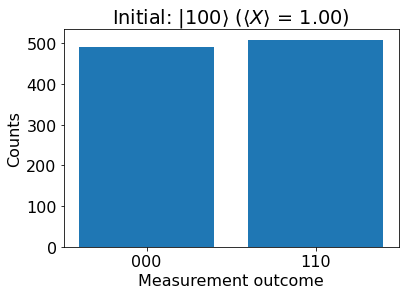

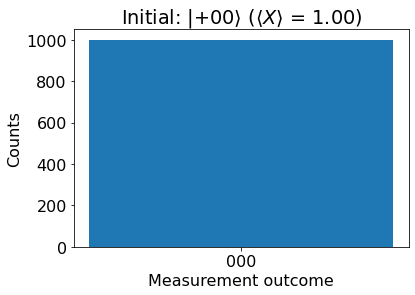

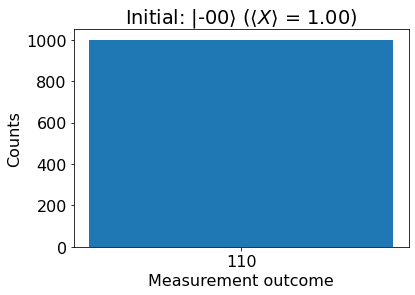

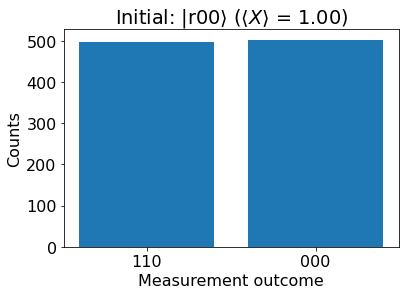

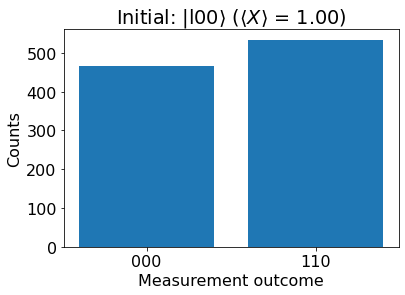

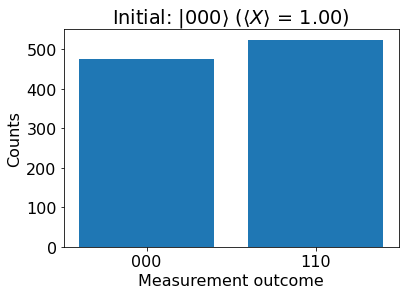

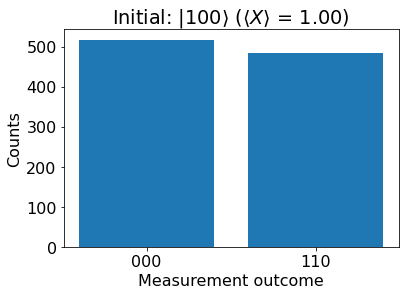

In [67]:
# SECOND CIRCUIT

def run_class_circ2(s,circ_func,makeGraph=True):
    Z = Operator.from_label("Z")

    backend = Aer.get_backend("qasm_simulator")
    shots = s
    expectedValues = {}

    preQubit = 2

    for c in ["0", "1", "+", "-", "r", "l", "0", "1"]:
        label = "0" * (3 - preQubit - 1) + c + "0" * (preQubit)
        stateVector = Statevector.from_label(label)
        circ = QuantumCircuit(3, 3)
        # Initialize the vector on the simulation to be the statevector
        circ.initialize(stateVector, circ.qubits)
        circ_func(circ)

        measure_from_label("XXX")(circ)

        job = execute(circ, backend, shots=shots)
        result = job.result()
        counts = result.get_counts(circ)

        expectedValues[c] = np.real(
            sum(
                [
                    Statevector.from_label(outcome).expectation_value(Z ^ Z ^ Z) * count / shots
                    for outcome, count in counts.items()
                ]
            )
        )
        if makeGraph == True:
            plt.figure()
            plt.bar(counts.keys(), counts.values())
            plt.title(f"Initial: |{label}$\\rangle$ ($\langle X\\rangle$ = {expectedValues[c]:.2f})")
            plt.xlabel("Measurement outcome")
            plt.ylabel("Counts")
            plt.show()
    return expectedValues

expectedValuesClassical_2 = run_class_circ2(1000,get_circ2_v2,True)

In [68]:
# RECOMBINE RESULTS
# Compute the composed expectation from cutted_statevalues
import numpy as np

def recompose(circuit1expectations,circuit2expectations):
# Coefficients:
    coefficients = [1 / 2, 1 / 2, 1 / 2, -1 / 2, 1 / 2, -1 / 2, 1 / 2, -1 / 2]
    expectation1 = [circuit1expectations[v] for v in "IIXXYYZZ"]
    expectation2 = [circuit2expectations[v] for v in "01+-rl01"]

    totalExpectation = 0
    for prod in zip(coefficients, expectation1, expectation2):
        totalExpectation += np.prod(prod)

    print("Final expectation:", totalExpectation)
    return totalExpectation

totalExpectation = recompose(expectedValuesClassical_1,expectedValuesClassical_2)

Final expectation: 1.0


### 4-Quantum Simulations

In [18]:
## QUANTUM SIMULATION FOR WHOLE CIRCUIT AND CIRCUIT-CUT SUBCIRCUITS AND REMERGING
### DON'T RUN THIS CELL, IT WILL RUN THIS THING IN IBM


import os

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 16})  # enlarge fonts

import sys

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "..")))
import json

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(os.environ["IBMQ_TOKEN"])

hub = "ibm-q-community"
group = "digiq-icfo-hack"
project = "main"

backend_name = "ibmq_jakarta"  # 7 qubits
# backend_name = "ibmq_guadalupe	" # 16 qubits

backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

Z = Operator.from_label("Z")

shots: int = 1000  # Number of shots to run each circuit for
outFolder = os.path.join(os.path.dirname(__file__), "quantum_out")


JSON = {}
print("Running first circuit...")
file = open(os.path.join(outFolder, "first_circuit.txt"), "w")
JSON["first_circuit"] = {}
for m in ["I", "X", "Y", "Z"]:
    print(f"Running measurement {m}...")
    JSON["first_circuit"][m] = {}
    circ = get_circ1()
    measure_from_label(f"X{m}X")(circ)

    transpiledCirc = transpile(circ, backend)
    job = backend.run(transpiledCirc, shots=shots, job_tags=["Plan B - first", "bcn_hackathon"])
    result = job.result()
    counts = result.get_counts(circ)

    print("Counts: ", counts)
    JSON["first_circuit"][m]["counts"] = counts

    if m != "I":
        expectedVal = sum(
            [
                np.real(Statevector.from_label(label).expectation_value(Z ^ Z ^ Z)) * count / shots
                for label, count in counts.items()
            ]
        )
    else:
        expectedVal = sum(counts.values()) / shots

    print(f"Expected value: {expectedVal:.2f}")
    file.write(f"{m}\t{expectedVal}\n")
    JSON["first_circuit"][m]["expected_value"] = expectedVal

    plt.figure()
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Measurement {m} ($\langle {m}\\rangle$ = {expectedVal:.2f})")
    plt.xlabel("Measurement outcome")
    plt.ylabel("Counts")
    plt.savefig(os.path.join(outFolder, f"first_circuit_{m}.png"))
    print("Saved figure!")

file.close()

with open(os.path.join(outFolder, "quantum.json"), "w") as f:
    json.dump(JSON, f)

preQubit = 2
file = open(os.path.join(outFolder, "second_circuit.txt"), "w")
JSON["second_circuit"] = {}
print("Running second circuit...")
for c in ["0", "1", "+", "-", "r", "l"]:
    JSON["second_circuit"][c] = {}
    label = "0" * (3 - preQubit - 1) + c + "0" * (preQubit)
    print(f"Running circuit with label {label}...")
    stateVector = Statevector.from_label(label)
    circ = QuantumCircuit(3, 3)
    # Initialize the vector on the simulation to be the statevector
    circ.initialize(stateVector, circ.qubits)
    get_circ2(circ)

    measure_from_label("XXX")(circ)

    transpiledCirc = transpile(circ, backend)
    job = backend.run(transpiledCirc, shots=shots, job_tags=["Plan B - second", "bcn_hackathon"])
    result = job.result()
    counts = result.get_counts(circ)

    print("Counts: ", counts)
    JSON["second_circuit"][c]["counts"] = counts

    expectedVal = np.real(
        sum(
            [
                Statevector.from_label(outcome).expectation_value(Z ^ Z ^ Z) * count / shots
                for outcome, count in counts.items()
            ]
        )
    )
    print(f"Expected value: {expectedVal:.2f}")

    file.write(f"{label}\t{expectedVal}\n")

    JSON["second_circuit"][c]["expected_value"] = expectedVal

    plt.figure()
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Initial: |{label}$\\rangle$ ($\langle X\\rangle$ = {expectedVal:.2f})")
    plt.xlabel("Measurement outcome")
    plt.ylabel("Counts")
    plt.savefig(os.path.join(outFolder, f"second_circuit_{c}.png"))
    print("Saved figure!")

file.close()

with open(os.path.join(outFolder, "quantum.json"), "w") as f:
    json.dump(JSON, f)

print("Running total circuit...")
# Total simulation
JSON["main"] = {}
circ = get_mainCirc()

measure_from_label("XXXXX")(circ)

transpiledCirc = transpile(circ, backend)
job = backend.run(transpiledCirc, shots=shots, job_tags=["Plan B - total", "bcn_hackathon"])
result = job.result()
counts = result.get_counts(circ)

print("Counts: ", counts)
JSON["main"]["counts"] = counts

expectedVal = np.real(
    sum(
        [
            Statevector.from_label(outcome).expectation_value(Z ^ Z ^ Z ^ Z ^ Z) * count / shots
            for outcome, count in counts.items()
        ]
    )
)

print(f"Expected value: {expectedVal:.2f}")

JSON["main"]["expected_value"] = expectedVal

plt.figure()
plt.bar(counts.keys(), counts.values())
plt.title(f"Initial: |{label}$\\rangle$ ($\langle X\\rangle$ = {expectedVal:.2f})")
plt.xlabel("Measurement outcome")
plt.ylabel("Counts")
plt.savefig(os.path.join(outFolder, f"main_circuit.png"))

print("Saved figure!")

with open(os.path.join(outFolder, "quantum.json"), "w") as f:
    json.dump(JSON, f)

print("Done!")

NameError: name '__file__' is not defined

Falta grafiques quantum
Falta analisis resultats i conclusions

### Error Analysis

Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)
Final expectation: 1.0
Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)
Final expectation: 1.0
Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)
Final expectation: 1.0
Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)
Final expectation: 1.0
Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)
Final expectation: 1.0
Expected value of X: (0.9999999999999998+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999998+0j)
Final expectation: 1.0
Expected value of X: (0.9999999999

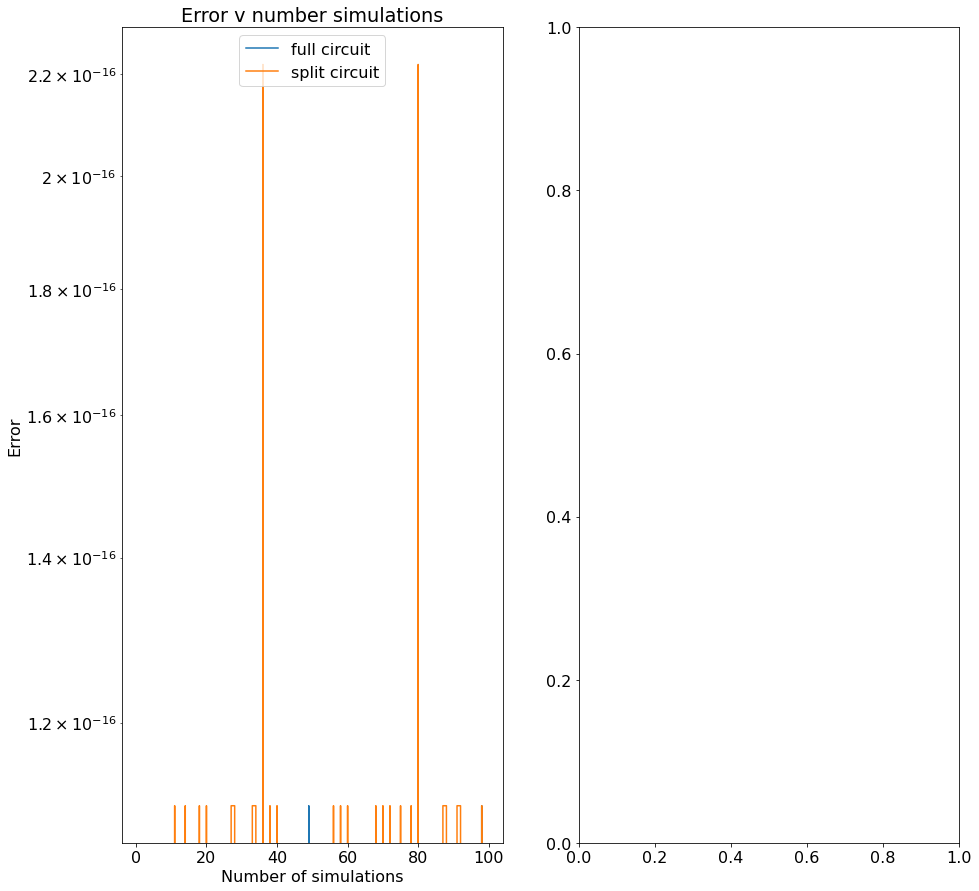

In [70]:
# Classic simulation for entire circuit
def expX_class_full(n): # n = number of shots
    mainCirc = get_mainCirc()
    mainCircuit = Xmeasure(mainCirc, range(5), range(5))
    count = histogram(mainCircuit, n)
    # Use Z since we are "measuring" countings
    # Compute expectation value:
    expectation = 0
    totalTimes = sum(count.values())
    for key, times in count.items():
        state = Statevector.from_label(key)
        expectation += state.expectation_value(Z ^ Z ^ Z ^ Z ^ Z) * times / totalTimes
  
    expected_X = np.abs(1.0-expectation)

    return expected_X

# Classic simulation for split circuit
def expX_class_split(n,circ_func1,circ_func2):
    expect1 = run_class_circ1(n,circ_func1,makeGraph=False)
    expect2 = run_class_circ2(n,circ_func2,makeGraph=False)
    expectation = recompose(expect1,expect2)
    expected_X = np.abs(1.0-expectation)
    return expected_X

N = list(range(1,100,1))
full_circuit_error = np.ndarray(len(N),dtype=float)
split_circuit_error = np.ndarray(len(N),dtype=float)

full_circuit_error = [expX_class_full(n) for n in N]
split_circuit_error = [expX_class_split(n,get_circ1,get_circ2_v2) for n in N]

print(full_circuit_error)

fig, ax = plt.subplots(1,2,figsize=(15,15))
fig
ax[0].plot(N,full_circuit_error,label="full circuit")
ax[0].plot(N,split_circuit_error, label="split circuit")

ax[0].legend(loc=9)
ax[0].set_xlabel("Number of simulations")
ax[0].set_ylabel("Error")
ax[0].set_title("Error v number simulations")

ax[0].set_yscale('log')

plt.show()

In [71]:
# Get a variation of the subcircuits to see if cutting from the other side of Rx(pi/5) gives more error or not

def get_circ1_var(initialCircuit=None):
    if not initialCircuit:
        circ1 = QuantumCircuit(3, 3)
    else:
        circ1 = initialCircuit
    circ1.h([0, 1, 2])  # Hadamard gate
    circ1.cx(0, 2)  # Ctrl C gate (target, where applies gate)
    circ1.rx(np.pi / 2, 2)  # Rx gate
    circ1.cx(0, 1)
    circ1.rx(np.pi / 5, 1)
    circ1.rx(np.pi / 2, 0)
    return circ1

# SECOND PART CIRCUIT
def get_circ2_var(initialCircuit=None):
    if not initialCircuit:
        circ2 = QuantumCircuit(3, 3)
    else:
        circ2 = initialCircuit
    circ2.h(range(2))
    circ2.rx(np.pi / 2, 0)
    circ2.cx(2, 0)
    circ2.rx(np.pi / 2, 0)
    circ2.cx(1, 2)
    circ2.rx(np.pi / 2, 1)
    return circ2

In [30]:
split_circuit_error_var = [expX_class_split(n,get_circ1_var,get_circ2_var) for n in N]


ax[1].plot(N,full_circuit_error,label="full circuit")
ax[1].plot(N,split_circuit_error_var, label="split circuit var")


ax[0].legend(loc=9)
ax[0].set_xlabel("Number of simulations")
ax[0].set_ylabel("Error")
ax[0].set_title("Error v number simulations")

ax[0].set_yscale('log')

plt.show()

Expected value of X: (0.9999999999999996+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999996+0j)
(0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(-0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(-0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(-0.5, 1.0, 1.0)
Final expectation: 1.0
Expected value of X: (0.9999999999999996+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999996+0j)
(0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(-0.5, 1.0, 1.0)
(0.5, -1.0, 1.0)
(-0.5, -1.0, 1.0)
(0.5, 0.0, 1.0)
(-0.5, 0.0, 1.0)
Final expectation: 1.0
Expected value of X: (0.9999999999999996+0j)
Expected value of Y: 0j
Expected value of Z: 0j
Expected value of I: (0.9999999999999996+0j)
(0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(0.5, 1.0, 1.0)
(-0.5, 1.0, 1.0)
(0.5, -0.3333333333333333, 1.0)
(-0.5, -0.3333333333333333, 1.0)
(0.5, -0.3333333333333333, 1.0)
(-0.5, -0.3333333333333333, 1.0)
Final expectation: 1.0
Expected value of X: (0.9999999999999996+0j)
Expected valu

Falta analysis resultats

### Second step

The researchers are very happy that we know how to do cuts now. But they are seeing the complications of the final algorithm pile up! For this reason it will be useful to learn to optimize our circuit further before moving on to larger circuits, then we can be sure that we will be able to run them. In addition, sometimes it will also be necessary to do more than one cut, as we will see in the final step.

1. First of all, how does the number of measurements grow with the number of cuts? 

*Hint: You can use the same circuit from the previous step and try to do additional cuts. The most difficult case is when the cuts are on the same qubit - we won't require that you show us here how to do that, but we will be needing it in the third step.*

2. You probably saw that the growth is pretty bad. An incredibly useful optimization would be to reduce the scaling by changing the number of measurement-preparation pairs that we have to do. Maybe we don't need to do all the combinations, can you find a smaller set that gives us the statistics of the whole thing? 

*Hint: As we have explained above, measuring on the I and Z basis is the same, so we can save resources. Maybe we can find a relation for reducing the number of states that we have to prepare too?*

*Hint 2: From now on we will only require that you solve this by running the circuit in the quantum device or the quantum device simulator. However, you can still use the statevector simulation to help you find the right intuition.*


--------------

For a circuit cutted once, the first subcircuit will be measured with the different combinations of the operators that allow us to represent the output state, and the second subcircuit will be measured for the different states of these operators as the input at the "cutted" qubit. In our case, the first subcircuit is observed four times for iteration and the second one eight times (without optimitzation). For every other cut applied, the subcircuit created between in the middle of other subcircuits will be runned for every operator state and observed for the different operators.

Generalizing for $M$ operators with two different eigenstates each, the number of measurements per single iteration will be

$\text{Measurements} = 2(C-1)M + 3CM$ ,

being $C$ the number of cuts applied. It is seen the direct relation with the number of observables applied.

If we count the number of qubits measured per single iteration, the relation becomes

$\text{Qubits Used} = M \left( n_1 + 2M \sum^{C-1}_{i=2} n_i + 2 n_N \right) = M [ - n_1 + 2M (N+C) - 6 n_N ]$ ,

being $n_i$ the number of qubits of a subcircuit $i$ and $N$ the total number of qubits. Is value is also proportional to the number of cuts. It is curious to comment that to know the number of qubits measured it is only needed to know the number of qubits of the first and last subcircuit.

--------------

As it is said, it is possible to reduce the number of measurement-preparation pairs trivially noticing that measuring on the I and Z basis is the same. It could be also usefull to check if in a small subcircuit the states don't transform in one of the Bloch sphere axis, knowing in advance the result of measuring in that direction.

--------------

3. Once you find a better scaling of the number of measurements and states initialization, run again the previous cut circuit in the simulation of the quantum computer and on the real device. Do we have more error now than before? It is what we would expect? 

Your answer here

4. Another strategy that may help you with errors is to run the circuit cut in parallel, in other words, use the same quantum computer to perform the measurements and the initialization at the same time. Of course, this only will work for small circuits that can be fitted into the quantum computer we possess. Despite this, implement the cut on the previous circuit in parallel and explain how many circuits we have to prepare compared with the previous case. 


The use of **optimization techniques will be evaluated**. Some ideas are: 
-  Error mitigation, measurement calibration, single qubit calibration. You can find more information in the qiskit documentation. 
- It may be that some qubits perform better than others.  If you're not running circuits in parallel, it will be useful to find which ones are best to use.
- If you have spare qubits in your chip, they might be able to play a role.
- You can experiment with different places and depths to cut or try any optimization method that you find suitable. 



In [2]:
# Your code here 



### Third step

We are working now with more advanced circuits that are a crucial piece in running hamiltonian evolution algorithms. So, we're right at the door of real-world applications! However, this last step will be much harder. To make circuit cutting useful, we need to implement multiple cuts, and they will not always be independent. This means that we now need to think about how to piece the statistics back together when we can't build the expected values step by step going backwards from the end.

1. Cut this circuit with at least 1 cut. You may need more than one cut, but find the optimal strategy to perform the minimum number of cuts. Each cut should contain at least 3 qubits. 

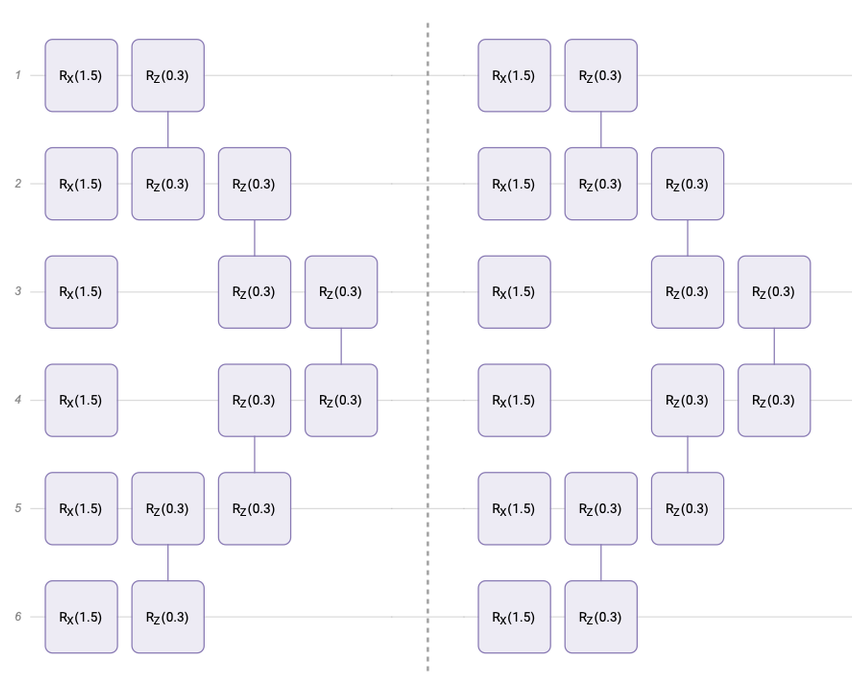

The dashed line does not have any physical meaning, they indicate the repetition of the same set of quantum gates. The two-qubit gates represent the following operation: $e^{it\sigma_z\otimes \sigma_z/2}$ where $t = 0.3$ and can be represented by 

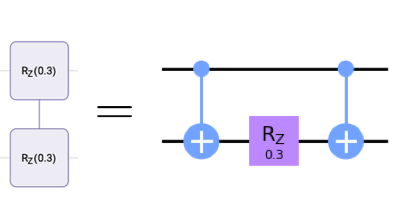


We recommend that you think of the problem in the original description ($O_1 ,\dots,  O_8$ and $\rho_1, \dots, \rho_8$), even if you found a reduction to the number of circuits you have to run. With this, you can see how the statistics would work with two cuts in the same qubit (with at least a gate in between). This can be generalized to many qubits!

*Hint: The algorithm to put together the statistics of the last cut before the measurement is slightly different than the rest. If you do several cuts on the same qubit, the algorithm for the rest of the cuts should be identical!*

Again, you can re-arrange the qubits or even move the order of the quantum gates (when this does not affect the result of the algorithm).

2. Again, you have to evaluate the quantum circuit with and without the cut or cuts. You can run in the *ibmq_jakarta* or *ibmq_guadalupe* (if your circuit fits) and try it first on the simulators. Measure the overlap between the state after the circuit $\ket{\psi}$ with the one state $\ket{111111}$, given by $|\bra{111111}\ket{\psi} \rangle |^2$. This can be thought of as the expectation value of the projector $\Pi = \ket{111111}\bra{111111}$. Feel free to apply the optimization methods that you have found in the previous steps. 


*Hint: You can use the qubit reset operation (see https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/reset/backend_reset) or an extra qubit to simulate the cut (a kind of ancilla qubit). Ensure that the reset operation works fine in the real quantum device.*



In [ ]:
# Your code here

3. Once you have done this task, you have to cut this bigger circuit into sub-circuits that can be fitted in smaller quantum xips.

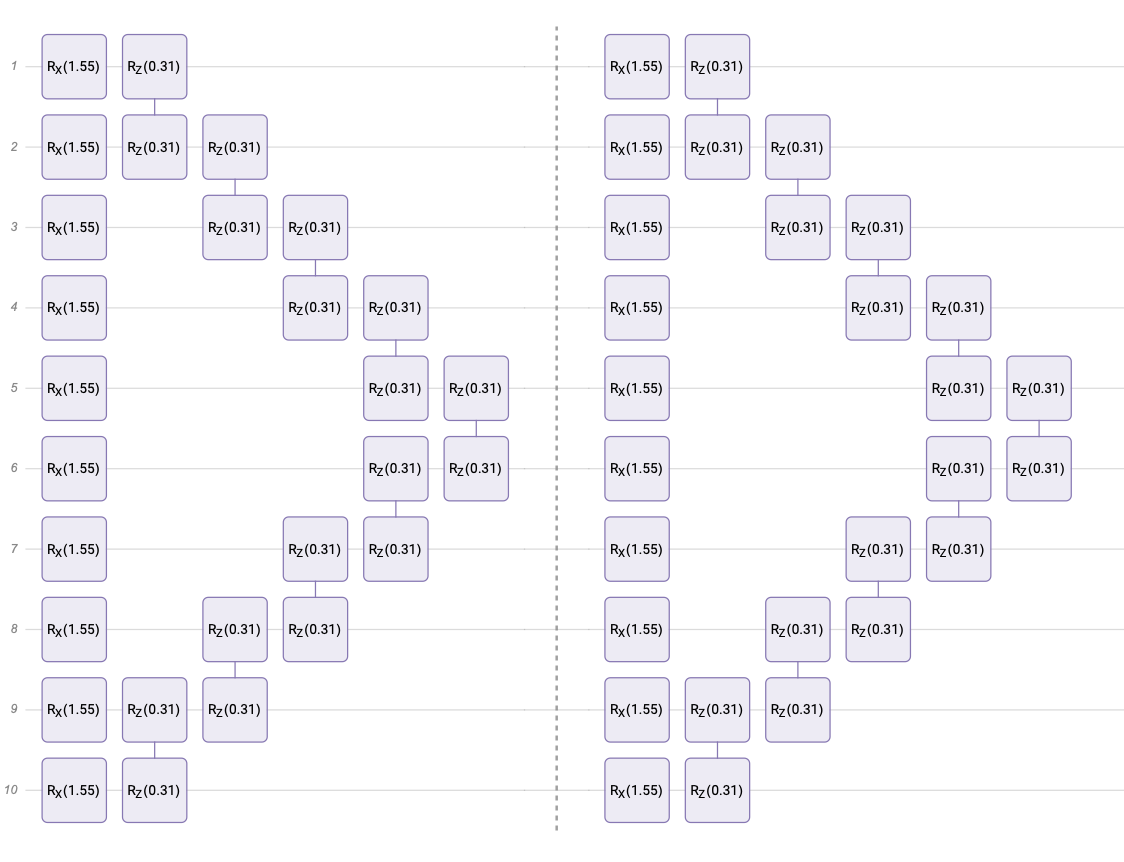




Can you find a way of evaluating the overlap with as much precision as possible?

If the result of cutting this circuit is precise enough, the simulations that the resistance can perform will be greatly enhanced. 

Thus, their dream of a sistematic dismantling of bioweapons will be very close to a reality...

In [1]:
# Your code here 